In [27]:
import sys
import ssl

ssl._create_default_https_context = ssl._create_unverified_context
sys.path.append('../')

import numpy as np
import random
from IPython.display import Image

import torch
from torch.utils.data import DataLoader

from torchvision.datasets import CIFAR10

from utils import show_first_batch, transform_data, show_images
from train import Trainer
from diffusion_models.iddpm import GaussianDiffusion

from reverse_models.iunet.unet import Unet

import ipywidgets as widgets
widgets.IntSlider()

SEED = 0
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

Files already downloaded and verified


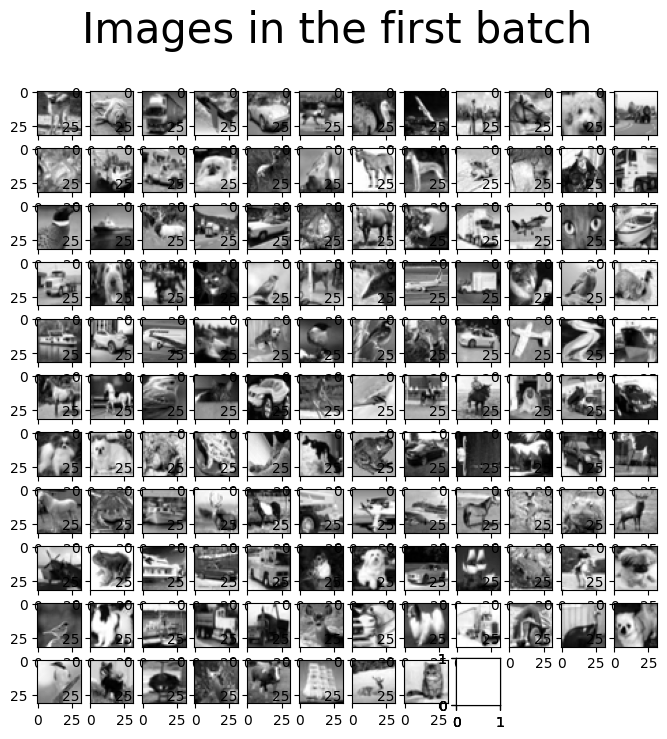

In [2]:
dataset = transform_data(CIFAR10)
train_dataloader = DataLoader(dataset, batch_size=128, num_workers=0, shuffle=True)
show_first_batch(train_dataloader)

In [3]:
model = Unet(
    dim = 64
).to(device)

diffusion = GaussianDiffusion(
    model,
    image_size = 32,
    timesteps = 1000,          
    sampling_timesteps = 250,  
    loss_type = 'l2'           
).to(device)


In [ ]:
trainer = Trainer(
    diffusion,
    train_dataloader,
    train_lr = 8e-5,
    train_num_steps = 700000, 
    device=device
    )        

In [60]:
trainer.train()

loss: 0.0580:  43%|████▎     | 301162/700000 [00:09<19:47:15,  5.60it/s]


KeyboardInterrupt: 

In [61]:
store_path = '../model_weights/iddpm_cifar_steps_1000.pt'
torch.save(diffusion.state_dict(), store_path)

sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

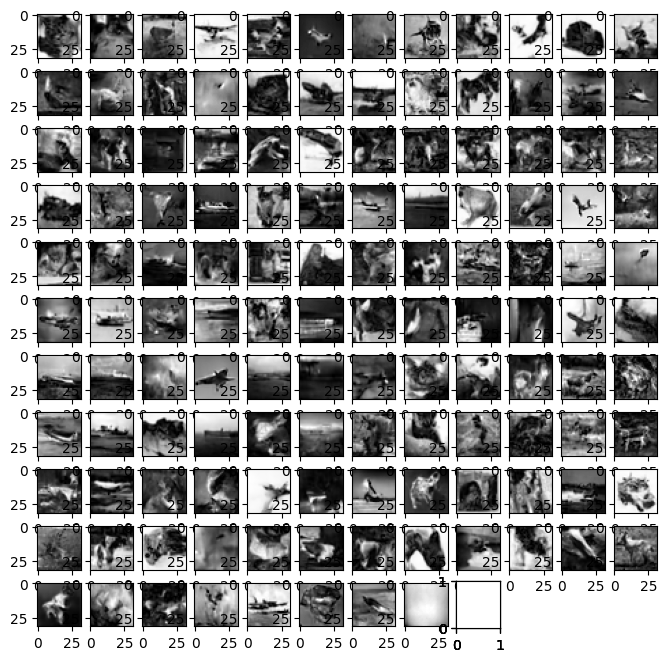

In [65]:
sample_images = diffusion.sample(batch_size = 128)
show_images(sample_images)